<a href="https://colab.research.google.com/github/YaswanthKondabattula/DATA-SCIENCE/blob/main/prodigyinfotech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK-1**

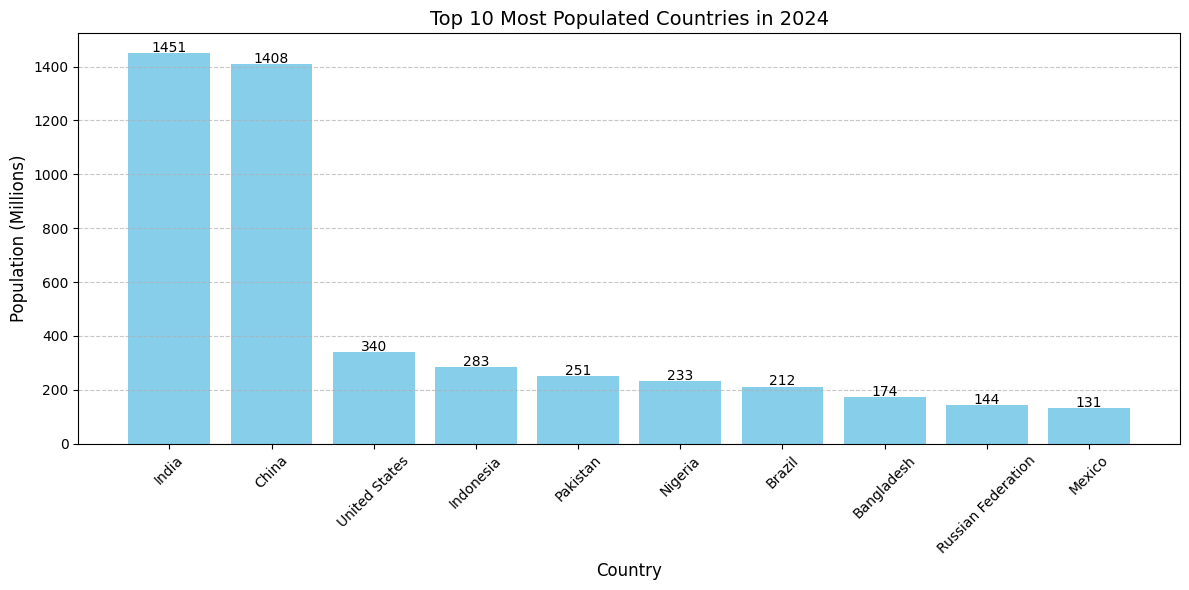

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

#Step 1: Define the data
data = {
    "Country": [
        "India", "China", "United States", "Indonesia", "Pakistan",
        "Nigeria", "Brazil", "Bangladesh", "Russian Federation", "Mexico"
    ],
    "Population (Thousands)": [
        1450935.79, 1408375.00, 340110.90, 283487.93, 251269.16,
        232679.48, 211998.57, 173562.36, 143533.85, 130961.01
    ]
}

#Step 2: Create a DataFrame
df = pd.DataFrame(data)

#Step 3: Convert population to millions for better readability
df["Population (Millions)"] = df["Population (Thousands)"] / 1000

#Step 4: Create the bar chart
plt.figure(figsize=(12, 6))
bars =  plt.bar(df["Country"], df["Population (Millions)"], color='skyblue')
plt.title("Top 10 Most Populated Countries in 2024", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Population (Millions)", fontsize=12)
plt.xticks(rotation=45)

#Step 5: Add value Labels on top of each har
for bar in bars:
    yval =  bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval +  5, f"{yval:.0f}", ha='center', fontsize=10)

#Step 6: Display the chart
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## TASK-2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()



Saving gender_submission.csv to gender_submission (1).csv


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving train.csv to train (1).csv


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving test.csv to test (1).csv


In [ ]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

# Preview data
print(train_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


/tmp/ipython-input-20-2695508927.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-20-2695508927.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

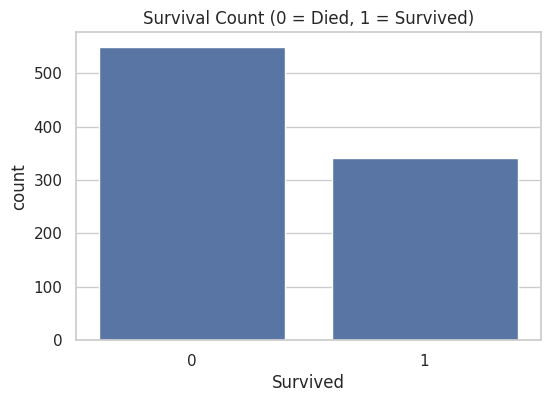

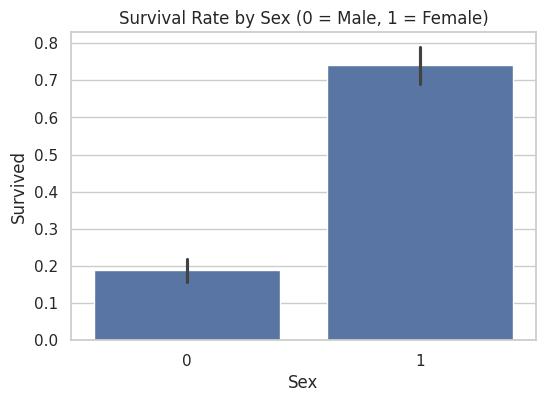

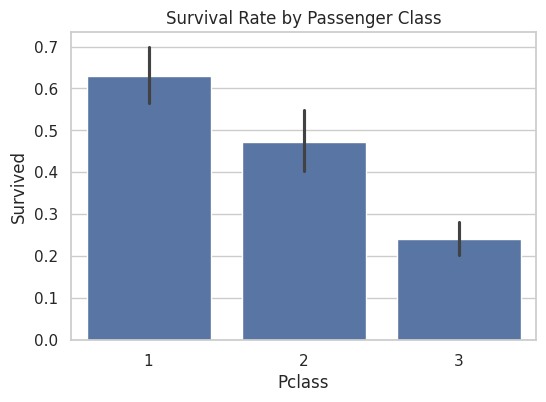

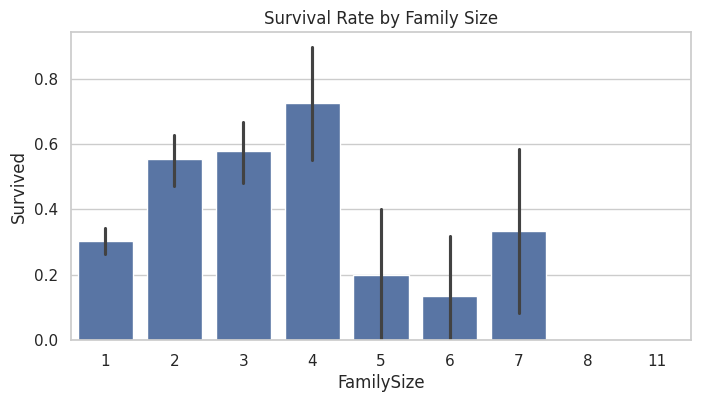

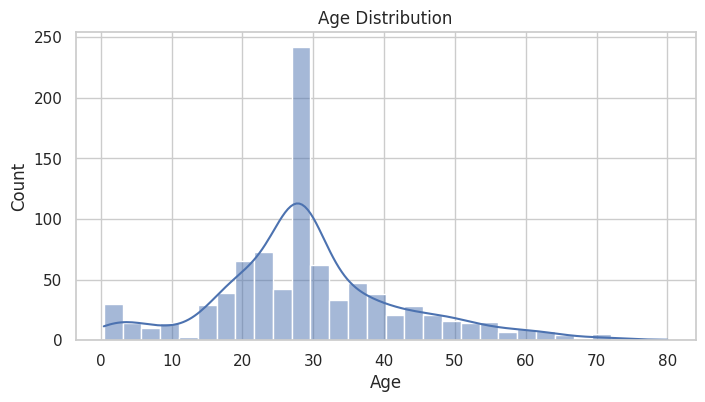

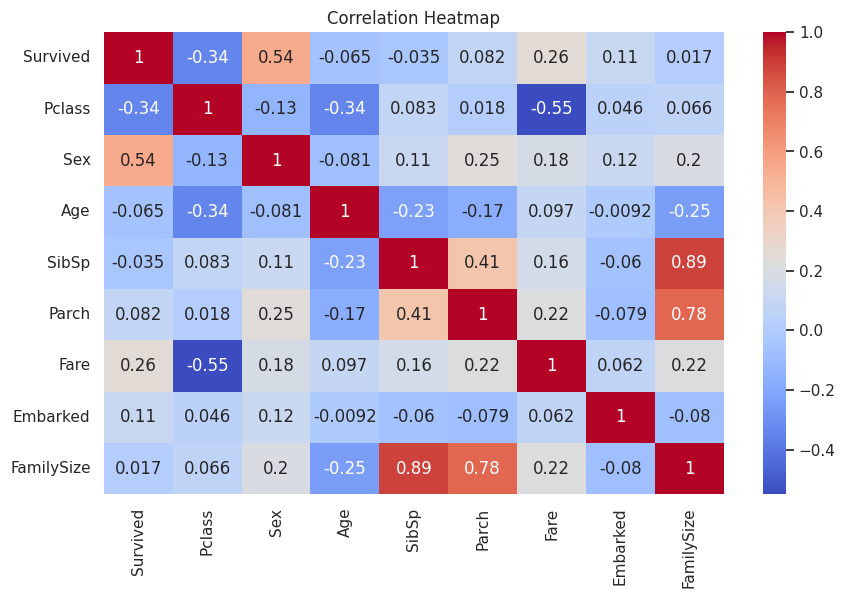

In [ ]:
# Step 1: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style='whitegrid')

# Step 2: Load datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

# Step 3: Make a working copy of the training data
df = train_df.copy()

# Step 4: Data Cleaning

# Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin (too many missing values)
df.drop(columns=['Cabin'], inplace=True)

# Convert categorical to numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Create new feature: FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Step 5: Exploratory Data Analysis (EDA)

# 1. Survival Count
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df)
plt.title("Survival Count (0 = Died, 1 = Survived)")
plt.show()

# 2. Survival by Sex
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Sex (0 = Male, 1 = Female)")
plt.show()

# 3. Survival by Passenger Class
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

# 4. Survival by Family Size
plt.figure(figsize=(8, 4))
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title("Survival Rate by Family Size")
plt.show()

# 5. Age Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.show()

# 6. Correlation Heatmap
# Drop non-numeric columns before correlation
numeric_df = df.drop(columns=['Name', 'Ticket', 'PassengerId'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


**TASK-3**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bank.csv to bank.csv


In [ ]:
# 📥 STEP 2: Load the dataset (use the correct file name)
import pandas as pd

df = pd.read_csv("bank.csv", sep=';')  # Use ';' because it's a semicolon-separated file
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
# 📊 STEP 3: Explore the dataset
print(df.info())
print("\nTarget value counts:\n", df['y'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None

Target value counts:
 y
no     4000
yes     521
Name: count, dtype: int64


In [ ]:
# 🧹 STEP 4: Encode categorical columns
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
le_dict = {}

for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df[col])
        le_dict[col] = le  # Save encoder for later use if needed


In [ ]:
# ✂️ STEP 5: Train/Test split
from sklearn.model_selection import train_test_split

X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# 🌳 STEP 6: Train the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [ ]:
# 📈 STEP 7: Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = clf.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧾 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Accuracy: 0.901657458563536

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       807
           1       0.57      0.38      0.45        98

    accuracy                           0.90       905
   macro avg       0.75      0.67      0.70       905
weighted avg       0.89      0.90      0.89       905


🧾 Confusion Matrix:
 [[779  28]
 [ 61  37]]


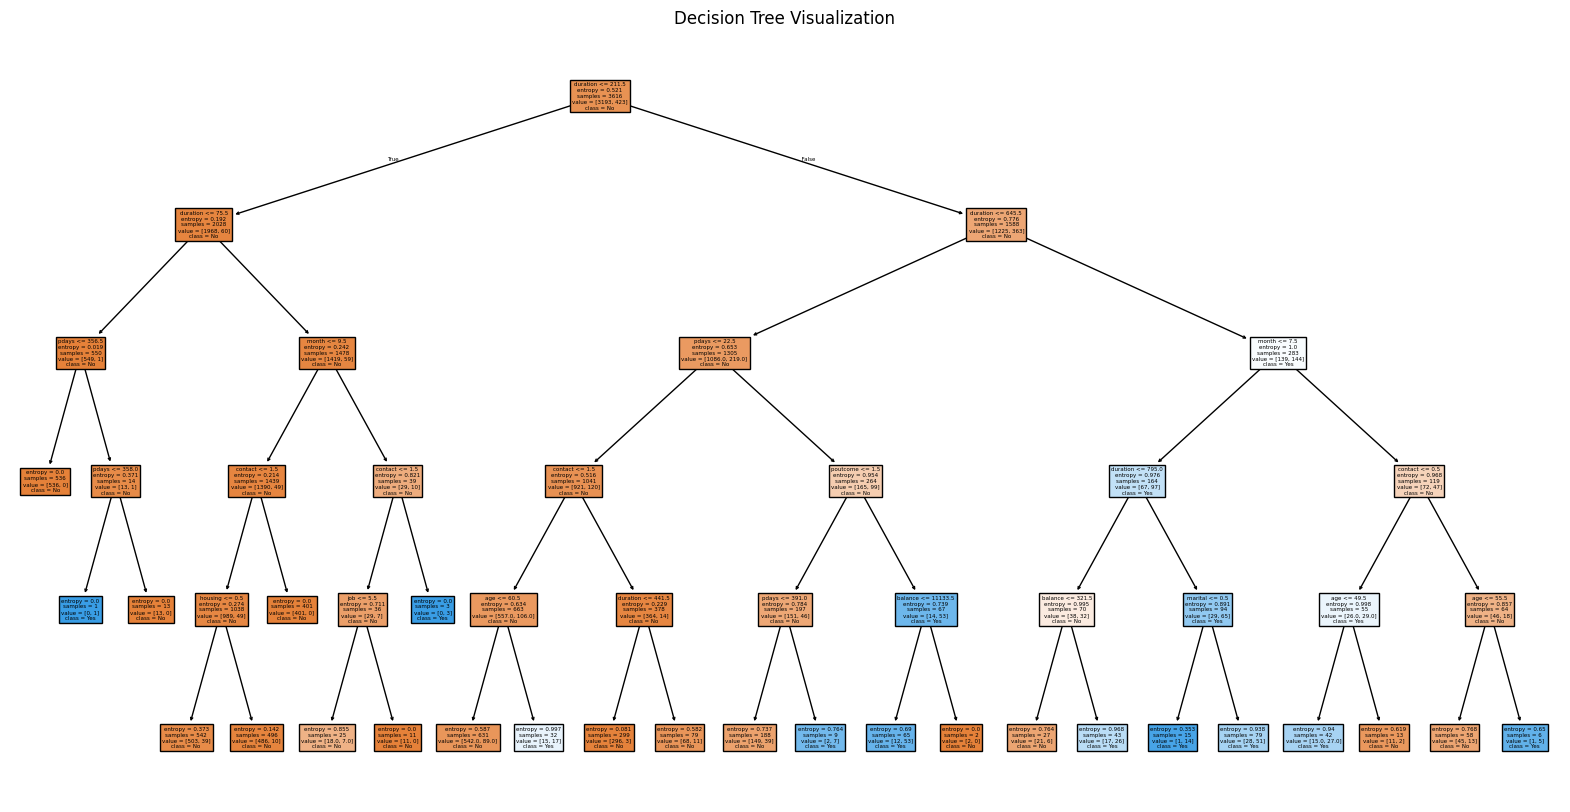

In [ ]:
# 🌳 STEP 8: Visualize the Decision Tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


TASK-4

In [1]:
 from google.colab import drive
drive.mount('/content/drive')


from google.colab import files
uploaded=files.upload()


import pandas as pd
data=pd.read_csv('/content/twitter_training.csv')
print(data)

Mounted at /content/drive


Saving twitter_training.csv to twitter_training.csv
       2401  Borderlands  Positive  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74676  9200       Nvidia  Positive   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   

      im getting on borderlands and i will murder you all ,  
0      I am coming to the borders and I will kill you...     
1      im getting on borderlands and i will kill you ...     
2      im coming on borderlands and i will murder you...     
3      im getting on borderlands 2 and i will murder ...     
4      im getting into borderlands and i can murder y...     
...                                                  ...     
74676  Just realized that the Windows partition of my... 

In [2]:
from google.colab import files
uploaded=files.upload()


import pandas as pd
data=pd.read_csv('/content/twitter_validation.csv')
print(data)

Saving twitter_validation.csv to twitter_validation.csv
     3364             Facebook  Irrelevant  \
0     352               Amazon     Neutral   
1    8312            Microsoft    Negative   
2    4371                CS-GO    Negative   
3    4433               Google     Neutral   
4    6273                 FIFA    Negative   
..    ...                  ...         ...   
994  4891  GrandTheftAuto(GTA)  Irrelevant   
995  4359                CS-GO  Irrelevant   
996  2652          Borderlands    Positive   
997  8069            Microsoft    Positive   
998  6960      johnson&johnson     Neutral   

    I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣  
0    BBC News - Amazon boss Jeff Bezos rejects clai...                                                                                        

In [3]:
import pandas as pd
data = pd.read_csv('/content/twitter_training.csv')
print(data.head())

   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


In [4]:
print(data.info())
print(data.sample(5))
print(data.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None
        2401                Borderlands  Positive  \
51560  10451     RedDeadRedemption(RDR)  Negative   
2637    1659  CallOfDutyBlackopsColdWar  Negative   
23513   4431                     Google   Neutral   
45924  11883                    Verizon   Neutral   
33200   6497                   Fortnite  Negative   

      im getting on 

In [5]:
# Drop missing or null rows (if any)
data.dropna(inplace=True)

# Rename columns if needed
data.columns = ['ID', 'Entity', 'Sentiment', 'Text']

# View class distribution
print(data['Sentiment'].value_counts())


Sentiment
Negative      22358
Positive      20654
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64


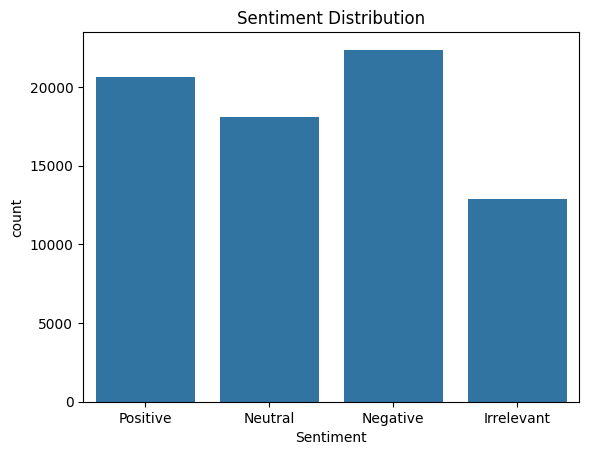

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data, x='Sentiment')
plt.title("Sentiment Distribution")
plt.show()


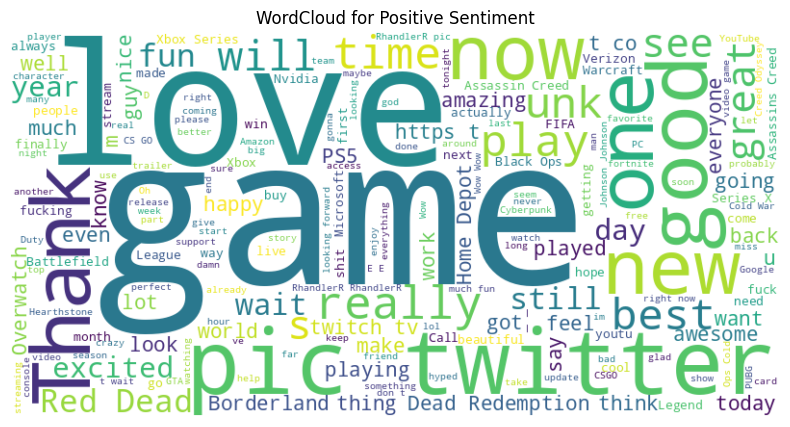

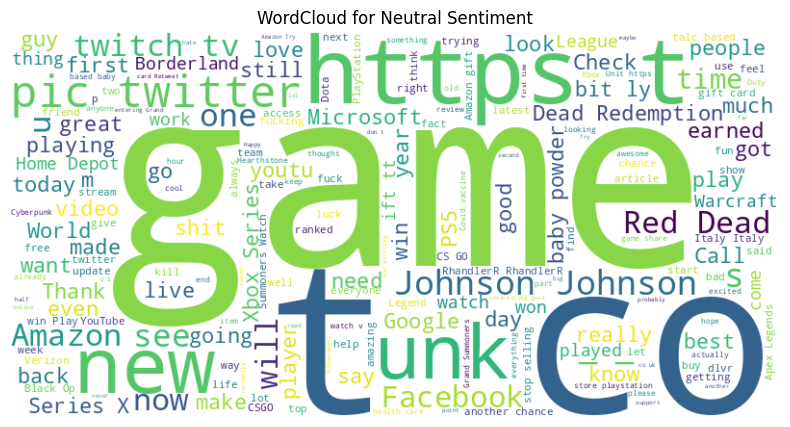

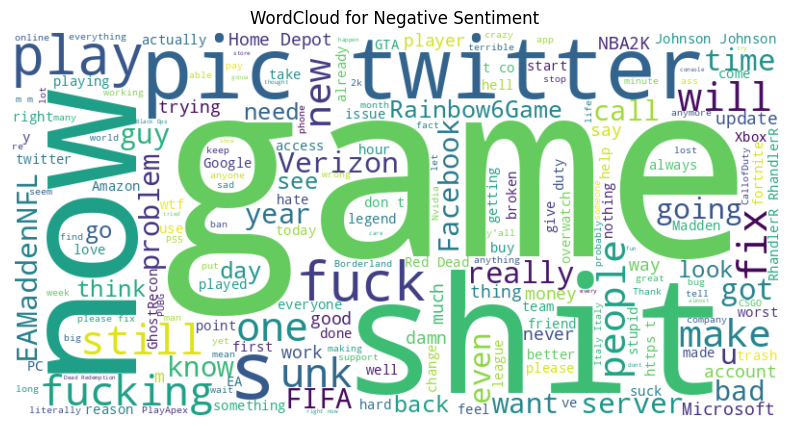

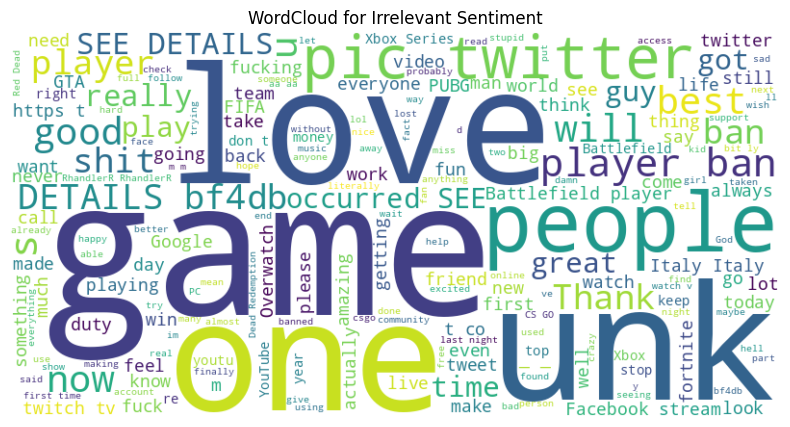

In [7]:
from wordcloud import WordCloud

for sentiment in data['Sentiment'].unique():
    text = " ".join(data[data['Sentiment']==sentiment]['Text'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for {sentiment} Sentiment')
    plt.show()


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf.fit_transform(data['Text'])
y = data['Sentiment']


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

pred = model.predict(X_test)
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

  Irrelevant       0.70      0.54      0.61      2624
    Negative       0.74      0.78      0.76      4463
     Neutral       0.70      0.64      0.67      3589
    Positive       0.66      0.77      0.71      4123

    accuracy                           0.70     14799
   macro avg       0.70      0.68      0.69     14799
weighted avg       0.70      0.70      0.70     14799



In [10]:
val_data = pd.read_csv('/content/twitter_validation.csv')
val_data.columns = ['ID', 'Entity', 'Sentiment', 'Text']
val_data.dropna(inplace=True)

X_val = tfidf.transform(val_data['Text'])
val_pred = model.predict(X_val)

from sklearn.metrics import accuracy_score
print("Validation Accuracy:", accuracy_score(val_data['Sentiment'], val_pred))


Validation Accuracy: 0.7957957957957958
